<a href="https://colab.research.google.com/github/patilpratikk/Machine-Learning/blob/main/Customers_to_Subscription_Through_App_Behavior_Fintech_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset


```
In this project, working on financial application data and predict the customer who will take a premium version app subscription or not. 
Then the company will take action on the customers to give the offers or not. The data contain the customer’s behavior and our job to find the insights from it. To complete this project, 
use python programming and it’s libraries numpy, Pandas, matplotlib, and Seaborn..

The Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. 
It has two versions free and premium. The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.

The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it.
That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. 
After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not.
If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. 
Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to those customers and earn more money.






```



# Drive mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser #convert time in date time data type


# Importing data



```
# for understaing purpose lets import all the files in the folder to our data frame
```



In [ ]:
import glob

In [ ]:
# Get CSV files list from a folder
path = '/content/drive/MyDrive/DS Aegis/Datasets/Fintech Data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)

In [ ]:
big_df.shape

(100058, 55)



```
# lets start with actual file
```



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DS Aegis/Datasets/Fintech Data/FineTech_appData.csv')

In [ ]:
df.shape

(50000, 12)

In [ ]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [ ]:
# reading screen list details from secreen list column
for i in range(10):
  print(df.loc[i, 'screen_list'],'\n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 

product_review,product_review2,ScanPreview 

Splash,Cycle,Home,Credit3Container,Credit3Dashboard,Loan2,product_review,pr

In [ ]:
# lets check null values
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [ ]:
# cheking non null and datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [ ]:
# checking enrolled value counts (since its our Y variable)

df.enrolled.value_counts()

# here we can see that it is slightly imbalanced, we would balance the data using sampling techniques to evaluate our model

1    31074
0    18926
Name: enrolled, dtype: int64

In [ ]:
# lets check statistical values of each column
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# lets check for unique names and values in each column
col=df.columns
for i in col:
  print("""Unique value of {}\n
                           {}\n
                    len is {}\n""".format(i,df[i].unique(),len(df[i].unique() ) ) )

Unique value of user

                           [235136 333588 254414 ... 302367 324905  27047]

                    len is 49874

Unique value of first_open

                           ['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']

                    len is 49747

Unique value of dayofweek

                           [3 6 1 4 2 0 5]

                    len is 7

Unique value of hour

                           [' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']

                    len is 24

Unique value of age

                           [ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  

In [ ]:
# lets convert hour column to integer format
df['hour']=df['hour'].str.slice(1,3).astype(int)
df['hour']

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [ ]:
# lets check how many people that have enrolled for premium subcription liked the app 
df.groupby(['liked', 	'used_premium_feature','minigame'])['enrolled'].value_counts()

liked  used_premium_feature  minigame  enrolled
0      0                     0         1           19384
                                       0           11936
                             1         1            2551
                                       0             709
       1                     0         1            3124
                                       0            2734
                             1         1             951
                                       0             361
1      0                     0         1            3827
                                       0            2425
                             1         1             449
                                       0             118
       1                     0         1             599
                                       0             580
                             1         1             189
                                       0              63
Name: enrolled, dtype: int64

In [ ]:
# lets check for people who have liked the app but haven't enrolled 
df.groupby(['liked'])['enrolled'].value_counts()
# so 3186 people are our potential customers to whom we can send offers since they are more likey to purchase the app after offers 

liked  enrolled
0      1           26010
       0           15740
1      1            5064
       0            3186
Name: enrolled, dtype: int64

In [ ]:
df.groupby('enrolled')['numscreens'].mean() # average number of screens a person is using
# here we can see that enrolled people are likely to use more screens  

enrolled
0    16.874511
1    23.666988
Name: numscreens, dtype: float64

In [ ]:
# avegrage number of screens used by people who liked but not enrolled
df[(df['liked']==1) & (df ['enrolled']==0)]['numscreens'].mean()

16.59290646578782

In [ ]:
# avegrage number of screens used by people who used premium features but not enrolled
df[(df['used_premium_feature']==1) & (df ['enrolled']==0)]['numscreens'].mean()

18.445960406634565

In [ ]:
# avegrage number of screens used by people who used premium features and enrolled
df[(df['used_premium_feature']==1) & (df ['enrolled']==1)]['numscreens'].mean()

26.915073000205634

In [ ]:
# avegrage number of screens used by people who used premium features and did not liked but enrolled
df[(df['used_premium_feature']==1) & (df ['liked']==0) & (df ['enrolled']==1)]['numscreens'].mean()

26.924171779141105

In [ ]:
# average number of screens used by people who used premium features  liked and enrolled
df[(df['used_premium_feature']==1) & (df ['liked']==1) & (df ['enrolled']==1)]['numscreens'].mean()

26.868020304568528

In [ ]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [ ]:
df.age.describe()

count    50000.00000
mean        31.72436
std         10.80331
min         16.00000
25%         24.00000
50%         29.00000
75%         37.00000
max        101.00000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


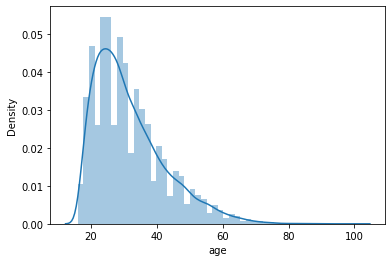

In [ ]:
sns.distplot( df['age'])
plt.show()
# we have right skewed age distribution

In [ ]:
df[df.enrolled==1]['age'].mean()

30.617332818433418

In [ ]:
# meadin age of people who enrolled 
pd.pivot_table(df, index=['enrolled'], values='age',aggfunc='median' )

,age
enrolled,
0,31
1,28


In [ ]:
df.groupby(['liked', 	'used_premium_feature'])['enrolled'].value_counts()

liked  used_premium_feature  enrolled
0      0                     1           21935
                             0           12645
       1                     1            4075
                             0            3095
1      0                     1            4276
                             0            2543
       1                     1             788
                             0             643
Name: enrolled, dtype: int64

In [ ]:
df[(df['liked']==0) & (df['used_premium_feature']==1) & (df['enrolled']==0)]['numscreens'].mean()

18.377059773828755

In [ ]:
# here we can see that average number of screens that people used who used premium features and did not liked and did not enrolled is close to the average of people who did not enrolled
# So maybe if these people explore a bit more screens, there is a potential that they might show intrest if we give them offer and if they use more number of screens 

In [ ]:
df[(df['liked']==0) & (df['used_premium_feature']==0) & (df['enrolled']==0)]['numscreens'].mean()

16.577698695136416

In [ ]:
pd.pivot_table(df, index=['liked', 'used_premium_feature', 'enrolled'], values=['numscreens'], aggfunc='mean') 

numscreens
liked used_premium_feature enrolled            
0     0                    0          16.577699
                           1          23.099202
      1                    0          18.377060
                           1          26.924172
1     0                    0          16.040503
                           1          22.885641
      1                    0          18.777605
                           1          26.868020

In [ ]:
df.groupby(['liked','used_premium_feature'])['enrolled'].value_counts()
# offers can be sent to 2543+643+3095 people in this category

liked  used_premium_feature  enrolled
0      0                     1           21935
                             0           12645
       1                     1            4075
                             0            3095
1      0                     1            4276
                             0            2543
       1                     1             788
                             0             643
Name: enrolled, dtype: int64

In [ ]:
offer_people=2543+643+3095
offer_people

6281

In [ ]:
# from above pivot table we can see that, for the people who did not liked but used premium features average number of screens are
  #enrolled=26.92
  # did not enrolled= 18.37
# if we manage to increase the usage of number of screens for people who did not enrolled but used premium features aur number of subscription will increase.
# So we would like to give offers to such people

In [ ]:
# Its intresting to see that more screens you use the possibility is more that you might enroll to premium app

In [ ]:
df['numscreens'].describe()
# so we can see that 



count    50000.000000
mean        21.095900
std         15.728812
min          1.000000
25%         10.000000
50%         18.000000
75%         28.000000
max        325.000000
Name: numscreens, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


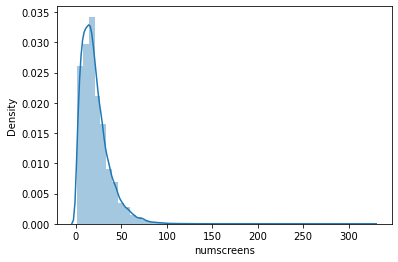

In [ ]:
sns.distplot(df['numscreens'])

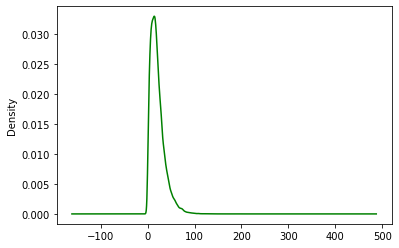

In [ ]:

df.numscreens.plot.density(color='green')
plt.show()
# so most of the screens used by people lie between 0 to 80

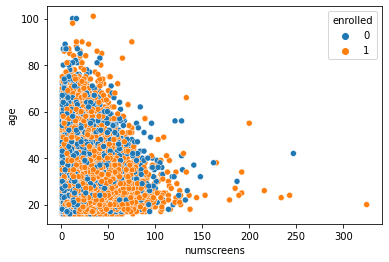

In [ ]:
sns.scatterplot(data=df, x='numscreens', y='age', hue='enrolled')
plt.show()



```
# We are intrested to identify the people who may enroll to premium subscription on giving offers.
These people may include those people who-

1.   liked the app but not enrolled
2.   used premium feature but did not enroll


```





```
So lets add a column to our data set (which would be dependent variable) stating to give offer or not 
```



In [ ]:
df['offer']=np.where( (df.liked==1) & (df.enrolled==0), 1,0)
 

In [ ]:
df['offer']=np.where( ( (df.liked==1) & (df.enrolled==0)  ) | ( (df.liked==0) & (df.enrolled==0) & (df.used_premium_feature==1) ), 1,0)

In [ ]:
df['offer'].value_counts()

0    43719
1     6281
Name: offer, dtype: int64

In [ ]:
df.corr() # obiously coorelation with used_premium_feature and liked column will be high with offer columns and it was the basis of our assumption

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,offer
user,1.000000,-0.002620,-0.012301,-0.003481,0.000058,0.006556,0.004130,-0.000519,0.007473,0.003969
dayofweek,-0.002620,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,0.011326,-0.005737,-0.005392
hour,-0.012301,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.066694,-0.001725,0.046960
age,-0.003481,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.131303,-0.002593,0.080294
numscreens,0.000058,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,0.209457,-0.007349,-0.087329
minigame,0.006556,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,0.104979,-0.012250,-0.026309
used_premium_feature,0.004130,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,-0.052703,0.001690,0.424944
enrolled,-0.000519,0.011326,-0.066694,-0.131303,0.209457,0.104979,-0.052703,1.000000,-0.007022,-0.485678
liked,0.007473,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,-0.007022,1.000000,0.349486
offer,0.003969,-0.005392,0.046960,0.080294,-0.087329,-0.026309,0.424944,-0.485678,0.349486,1.000000


In [ ]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,offer
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0


In [ ]:
df.enrolled.value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

In [ ]:
df.enrolled_date.isna().sum() # there are many records that are blank in this column as most of these people haven't enrolled to premium subscription so they wont have any enrollment rfate

18926

In [ ]:
# lets drop enrolled_date and first_open columns as they are not of much use for us now

In [ ]:
df.drop(columns=['enrolled_date','first_open'],inplace=True)

In [ ]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,offer
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1,0


In [ ]:
# lets import screen list data now
screen_list=pd.read_csv('/content/drive/MyDrive/DS Aegis/Datasets/Fintech Data/top_screens.csv').top_screens.values


In [ ]:
screen_list.shape

(58,)

In [ ]:
print(screen_list, type(screen_list))

['Loan2' 'location' 'Institutions' 'Credit3Container' 'VerifyPhone'
 'BankVerification' 'VerifyDateOfBirth' 'ProfilePage' 'VerifyCountry'
 'Cycle' 'idscreen' 'Credit3Dashboard' 'Loan3' 'CC1Category' 'Splash'
 'Loan' 'CC1' 'RewardsContainer' 'Credit3' 'Credit1' 'EditProfile'
 'Credit2' 'Finances' 'CC3' 'Saving9' 'Saving1' 'Alerts' 'Saving8'
 'Saving10' 'Leaderboard' 'Saving4' 'VerifyMobile' 'VerifyHousing'
 'RewardDetail' 'VerifyHousingAmount' 'ProfileMaritalStatus'
 'ProfileChildren ' 'ProfileEducation' 'Saving7' 'ProfileEducationMajor'
 'Rewards' 'AccountView' 'VerifyAnnualIncome' 'VerifyIncomeType' 'Saving2'
 'Saving6' 'Saving2Amount' 'Saving5' 'ProfileJobTitle' 'Login'
 'ProfileEmploymentLength' 'WebView' 'SecurityModal' 'Loan4' 'ResendToken'
 'TransactionList' 'NetworkFailure' 'ListPicker'] <class 'numpy.ndarray'>


In [ ]:
# lets convert list of screens in our original DataFrame to str first 
df['screen_list']=df['screen_list'].astype(str) +','
df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,offer
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,0,1
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0,0


In [ ]:
# lets covert there screen list to columns
for i in screen_list:
  df[i]=df.screen_list.str.contains(i).astype(int)
  df['screen_list']= df.screen_list.str.replace(i+",","")

In [ ]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked', 'offer',
       'Loan2', 'location', 'Institutions', 'Credit3Container', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category',
       'Splash', 'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1',
       'EditProfile', 'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1',
       'Alerts', 'Saving8', 'Saving10', 'Leaderboard', 'Saving4',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityMod

In [ ]:
df.shape

(50000, 69)

In [ ]:
df1=df.drop(['dayofweek','hour','age','screen_list','minigame','user','numscreens'],axis=1)
df1_enrolled=df1[df1.enrolled==1]
df1_enrolled

,used_premium_feature,enrolled,liked,offer,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,1,1,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
49992,0,1,0,0,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
49994,0,1,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
49995,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# counting how many people used each screen and how many did not used
for i in df1_enrolled.columns:
  print(df1[i].value_counts())

0    41399
1     8601
Name: used_premium_feature, dtype: int64
1    31074
0    18926
Name: enrolled, dtype: int64
0    41750
1     8250
Name: liked, dtype: int64
0    43719
1     6281
Name: offer, dtype: int64
1    25319
0    24681
Name: Loan2, dtype: int64
1    25888
0    24112
Name: location, dtype: int64
0    35317
1    14683
Name: Institutions, dtype: int64
0    33511
1    16489
Name: Credit3Container, dtype: int64
1    26230
0    23770
Name: VerifyPhone, dtype: int64
0    34023
1    15977
Name: BankVerification, dtype: int64
0    26326
1    23674
Name: VerifyDateOfBirth, dtype: int64
0    42098
1     7902
Name: ProfilePage, dtype: int64
0    28842
1    21158
Name: VerifyCountry, dtype: int64
0    31757
1    18243
Name: Cycle, dtype: int64
0    32965
1    17035
Name: idscreen, dtype: int64
0    40470
1     9530
Name: Credit3Dashboard, dtype: int64
0    42840
1     7160
Name: Loan3, dtype: int64
0    47002
1     2998
Name: CC1Category, dtype: int64
0    39962
1    10038
Name: Splash

In [ ]:
# lets count the number of one in diffenet screens ie. to check how people used the available screens and what its differnt for people who enrolled 

In [ ]:
ones_count=((df1.drop(['offer','used_premium_feature','enrolled','liked'], axis=1)==1).sum())

In [ ]:
ones_count # these are the total number of people who used the following screens irresspective of wheather they enrolled or not

Loan2                      25319
location                   25888
Institutions               14683
Credit3Container           16489
VerifyPhone                26230
BankVerification           15977
VerifyDateOfBirth          23674
ProfilePage                 7902
VerifyCountry              21158
Cycle                      18243
idscreen                   17035
Credit3Dashboard            9530
Loan3                       7160
CC1Category                 2998
Splash                     10038
Loan                        6132
CC1                         4370
RewardsContainer            4200
Credit3                     5226
Credit1                     9741
EditProfile                 2449
Credit2                     5402
Finances                    3827
CC3                         1475
Saving9                     3005
Saving1                     2770
Alerts                      3686
Saving8                     2784
Saving10                    2456
Leaderboard                 2576
Saving4   

In [ ]:
ones_count.shape

(58,)

In [ ]:
df1_enrolled 

,used_premium_feature,enrolled,liked,offer,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,1,1,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
49992,0,1,0,0,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
49994,0,1,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
49995,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
one_counts_enrolled=((df1_enrolled.drop(['offer','used_premium_feature','liked','enrolled'],axis=1)==1).sum()).sort_values(ascending=False)
one_counts_enrolled # screen usage of people who have enrolled

VerifyPhone                20967
location                   18970
VerifyDateOfBirth          17894
VerifyCountry              15844
Loan2                      15334
idscreen                   12744
Cycle                      12647
BankVerification           12264
Credit3Container           11194
Institutions                9404
Credit1                     9055
Credit3Dashboard            6663
Splash                      5732
ProfilePage                 4657
Loan3                       4357
Credit2                     4163
Credit3                     3398
CC1                         2787
RewardsContainer            2723
VerifyMobile                2453
Finances                    2438
WebView                     2419
Saving9                     2173
Saving1                     1977
CC1Category                 1968
Saving8                     1867
Saving10                    1780
Loan                        1677
Saving4                     1650
VerifyHousing               1622
ProfileMar

In [ ]:
df1_ntenrolled=df1[df1.enrolled==0]
df1_ntenrolled 

,used_premium_feature,enrolled,liked,offer,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49993,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
one_counts_ntenrolled=((df1_ntenrolled).drop(['offer', 'used_premium_feature','liked','offer','enrolled'],axis=1)==1).sum()
one_counts_ntenrolled.sort_values(ascending=False) #screen usage of people who haven't enrolled

Loan2                      9985
location                   6918
VerifyDateOfBirth          5780
Cycle                      5596
VerifyCountry              5314
Credit3Container           5295
Institutions               5279
VerifyPhone                5263
Loan                       4455
Splash                     4306
idscreen                   4291
BankVerification           3713
ProfilePage                3245
Credit3Dashboard           2867
Loan3                      2803
WebView                    2409
Alerts                     2365
Credit3                    1828
CC1                        1583
RewardsContainer           1477
Finances                   1389
Credit2                    1239
Leaderboard                1048
CC1Category                1030
Saving8                     917
EditProfile                 909
Saving9                     832
ProfileMaritalStatus        808
Saving1                     793
AccountView                 778
ProfileEducation            734
Login   

In [ ]:
# lest compare the screen usage overall vs enrolled vs not enrolled
screen_usage=pd.DataFrame({'Overall_screen_Usage':ones_count,'Enrolled_screen_Usage':one_counts_enrolled, 'Not_Enrolled_screen_Usage':one_counts_ntenrolled})
screen_usage 

,Overall_screen_Usage,Enrolled_screen_Usage,Not_Enrolled_screen_Usage
AccountView,1311,533,778
Alerts,3686,1321,2365
BankVerification,15977,12264,3713
CC1,4370,2787,1583
CC1Category,2998,1968,1030
CC3,1475,993,482
Credit1,9741,9055,686
Credit2,5402,4163,1239
Credit3,5226,3398,1828
Credit3Container,16489,11194,5295


In [ ]:
screen_usage=screen_usage.sort_values(by='Enrolled_screen_Usage',ascending=False)
screen_usage # arranging in descending order as per screen usage by enrolled people

,Overall_screen_Usage,Enrolled_screen_Usage,Not_Enrolled_screen_Usage
VerifyPhone,26230,20967,5263
location,25888,18970,6918
VerifyDateOfBirth,23674,17894,5780
VerifyCountry,21158,15844,5314
Loan2,25319,15334,9985
idscreen,17035,12744,4291
Cycle,18243,12647,5596
BankVerification,15977,12264,3713
Credit3Container,16489,11194,5295
Institutions,14683,9404,5279


In [ ]:
screen_usage['Difference_screen_usage']=screen_usage['Enrolled_screen_Usage']-screen_usage['Not_Enrolled_screen_Usage']
screen_usage

,Overall_screen_Usage,Enrolled_screen_Usage,Not_Enrolled_screen_Usage,Difference_screen_usage
VerifyPhone,26230,20967,5263,15704
location,25888,18970,6918,12052
VerifyDateOfBirth,23674,17894,5780,12114
VerifyCountry,21158,15844,5314,10530
Loan2,25319,15334,9985,5349
idscreen,17035,12744,4291,8453
Cycle,18243,12647,5596,7051
BankVerification,15977,12264,3713,8551
Credit3Container,16489,11194,5295,5899
Institutions,14683,9404,5279,4125


In [ ]:
# lets check screen usage of people who we will be giving the offers
df1_offer=df1[df1.offer==1]
one_counts_offer=((df1_offer.drop(['liked','enrolled','offer','used_premium_feature'], axis=1)==1).sum())

In [ ]:
one_counts_offer=one_counts_offer.sort_values(ascending=False)
one_counts_offer


Loan2                      3643
Loan                       2176
Institutions               2060
Cycle                      1997
Credit3Container           1984
location                   1794
Splash                     1723
VerifyCountry              1460
BankVerification           1360
VerifyPhone                1332
VerifyDateOfBirth          1315
idscreen                   1297
Credit3Dashboard           1274
ProfilePage                1189
Alerts                     1031
Loan3                       947
WebView                     946
Credit3                     671
RewardsContainer            562
CC1                         556
Finances                    535
Credit2                     523
AccountView                 468
Leaderboard                 399
CC1Category                 354
EditProfile                 293
Saving9                     283
Saving1                     281
Saving8                     279
ProfileMaritalStatus        251
TransactionList             243
ProfileE

In [ ]:
screen_usage['% enroll screen use']=(screen_usage['Enrolled_screen_Usage']/screen_usage['Enrolled_screen_Usage'].sum())*100
screen_usage

,Overall_screen_Usage,Enrolled_screen_Usage,Not_Enrolled_screen_Usage,Difference_screen_usage,% enroll screen use
VerifyPhone,26230,20967,5263,15704,8.872104
location,25888,18970,6918,12052,8.027081
VerifyDateOfBirth,23674,17894,5780,12114,7.571776
VerifyCountry,21158,15844,5314,10530,6.704327
Loan2,25319,15334,9985,5349,6.488522
idscreen,17035,12744,4291,8453,5.392574
Cycle,18243,12647,5596,7051,5.351529
BankVerification,15977,12264,3713,8551,5.189464
Credit3Container,16489,11194,5295,5899,4.736697
Institutions,14683,9404,5279,4125,3.979266


In [ ]:
screen_final=screen_usage.merge(pd.DataFrame({'Offer people usage':one_counts_offer}), right_index=True, left_index=True)

In [ ]:
screen_final

,Overall_screen_Usage,Enrolled_screen_Usage,Not_Enrolled_screen_Usage,Difference_screen_usage,% enroll screen use,Offer people usage
VerifyPhone,26230,20967,5263,15704,8.872104,1332
location,25888,18970,6918,12052,8.027081,1794
VerifyDateOfBirth,23674,17894,5780,12114,7.571776,1315
VerifyCountry,21158,15844,5314,10530,6.704327,1460
Loan2,25319,15334,9985,5349,6.488522,3643
idscreen,17035,12744,4291,8453,5.392574,1297
Cycle,18243,12647,5596,7051,5.351529,1997
BankVerification,15977,12264,3713,8551,5.189464,1360
Credit3Container,16489,11194,5295,5899,4.736697,1984
Institutions,14683,9404,5279,4125,3.979266,2060


In [ ]:
screen_final['% offer people screen use']=screen_final['Offer people usage']/screen_final['Offer people usage'].sum()*100

In [ ]:
screen_final

,Overall_screen_Usage,Enrolled_screen_Usage,Not_Enrolled_screen_Usage,Difference_screen_usage,% enroll screen use,Offer people usage,% offer people screen use
VerifyPhone,26230,20967,5263,15704,8.872104,1332,3.626562
location,25888,18970,6918,12052,8.027081,1794,4.884424
VerifyDateOfBirth,23674,17894,5780,12114,7.571776,1315,3.580277
VerifyCountry,21158,15844,5314,10530,6.704327,1460,3.975061
Loan2,25319,15334,9985,5349,6.488522,3643,9.918593
idscreen,17035,12744,4291,8453,5.392574,1297,3.531270
Cycle,18243,12647,5596,7051,5.351529,1997,5.437121
BankVerification,15977,12264,3713,8551,5.189464,1360,3.702796
Credit3Container,16489,11194,5295,5899,4.736697,1984,5.401726
Institutions,14683,9404,5279,4125,3.979266,2060,5.608647


In [ ]:
# In general we can see that there is significant difference in % usage of screens between people who enrolled and the people who did not enrolled and are potential customers

# modelling for Enrolled/not

In [ ]:
df1.head()

,used_premium_feature,enrolled,liked,offer,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Home,ScanPreview,VerifySSN,product_review,prod...",13,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
49996,169179,1,0,35,"Home,",4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,324905,6,12,27,"Home,product_review,product_review,product_rev...",26,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df1.drop(['offer','enrolled'],axis=1)
y=df1.loc[:,'enrolled']

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(50000, 60)
Shape of X after SMOTE:(62148, 60) 


Target Class distributuion before SMOTE:
1    0.62148
0    0.37852
Name: enrolled, dtype: float64
Target Class distributuion after SMOTE :
0    0.5
1    0.5
Name: enrolled, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=420,test_size=0.35)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit=LogisticRegression()

In [ ]:
logit.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=logit.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[8288, 2463],
       [3155, 7846]])

In [ ]:
log_acc=accuracy_score(y_test,y_pred)
log_acc

0.7417248988598749

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75     10751
           1       0.76      0.71      0.74     11001

    accuracy                           0.74     21752
   macro avg       0.74      0.74      0.74     21752
weighted avg       0.74      0.74      0.74     21752



# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred2=knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred2)

array([[8500, 2251],
       [3299, 7702]])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3=dt.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10751
           1       0.78      0.68      0.73     11001

    accuracy                           0.74     21752
   macro avg       0.74      0.74      0.74     21752
weighted avg       0.74      0.74      0.74     21752



# Ensemble Techniques


## Random Forest

In [ ]:
X_train.describe()

,used_premium_feature,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
count,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,...,40396.000000,40396.000000,40396.000000,40396.00000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000
mean,0.167517,0.158605,0.508268,0.483439,0.285548,0.317061,0.470814,0.285870,0.438261,0.151673,...,0.020175,0.027825,0.019235,0.09694,0.011882,0.014506,0.013194,0.011635,0.006709,0.006362
std,0.373441,0.365312,0.499938,0.499732,0.451681,0.465337,0.499154,0.451833,0.496180,0.358709,...,0.140601,0.164472,0.137350,0.29588,0.108358,0.119567,0.114108,0.107237,0.081632,0.079509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=10)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred4=rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred4))

[[8694 2057]
 [3272 7729]]


In [ ]:
accuracy_score(y_test,y_pred4)

0.7550110334681869

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     10751
           1       0.79      0.70      0.74     11001

    accuracy                           0.76     21752
   macro avg       0.76      0.76      0.75     21752
weighted avg       0.76      0.76      0.75     21752



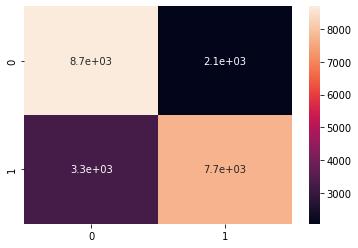

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred4), annot=True)

In [ ]:
fi=pd.DataFrame(rf.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)
fi

,0
Credit1,0.093783
VerifyPhone,0.090298
VerifyCountry,0.056236
VerifyDateOfBirth,0.054148
BankVerification,0.051947
location,0.051377
idscreen,0.040908
Loan,0.040363
Credit3Container,0.031185
Cycle,0.028808


## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier(n_estimators=50)

In [ ]:
xg.fit(X_train,y_train)

XGBClassifier(n_estimators=50)

In [ ]:
y_pred3=xg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred3))

[[8486 2265]
 [3228 7773]]


In [ ]:
accuracy_score(y_test,y_pred3)

0.7474714968738507

In [ ]:
print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           0       0.72      0.79      0.76     10751
           1       0.77      0.71      0.74     11001

    accuracy                           0.75     21752
   macro avg       0.75      0.75      0.75     21752
weighted avg       0.75      0.75      0.75     21752





```
# Since the data is very sparsed, there is no significant increase in the accuracy irrespetive of the algorithm we use
# Lets try some techniques to reduce sparsity and increase Accuracy  
```



# Modelling to identify whom to give Offers

In [ ]:
X1=df1.drop(['offer','enrolled'],axis=1)
y1=df1.loc[:,'offer']

In [ ]:
df1.offer.value_counts() # we will balance the minority class using SMOTE

0    43719
1     6281
Name: offer, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X_sm1 , y_sm1 = sm.fit_resample(X1,y1)

print(f'''Shape of X before SMOTE:{X1.shape}
Shape of X after SMOTE:{X_sm1.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y1.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm1.value_counts(normalize=True)}''')

Shape of X before SMOTE:(50000, 60)
Shape of X after SMOTE:(87438, 60) 


Target Class distributuion before SMOTE:
0    0.87438
1    0.12562
Name: offer, dtype: float64
Target Class distributuion after SMOTE :
0    0.5
1    0.5
Name: offer, dtype: float64


In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_sm1,y_sm1, random_state=369, test_size=0.3)

## Decision Tree Classifier

In [ ]:
dt.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [ ]:
y_pred5=dt.predict(X_test1)

In [ ]:
print(classification_report(y_test1,y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     13079
           1       0.92      0.96      0.94     13153

    accuracy                           0.94     26232
   macro avg       0.94      0.94      0.94     26232
weighted avg       0.94      0.94      0.94     26232



## Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(n_estimators=10)

In [ ]:
rf.fit(X_train1,y_train1)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred6=rf.predict(X_test1)

In [ ]:
print(confusion_matrix(y_test1,y_pred6))

[[12100   979]
 [  430 12723]]


In [ ]:
accuracy_score(y_test1,y_pred6)

0.946286977737115

In [ ]:
print(classification_report(y_test1,y_pred6))

              precision    recall  f1-score   support

           0       0.97      0.93      0.94     13079
           1       0.93      0.97      0.95     13153

    accuracy                           0.95     26232
   macro avg       0.95      0.95      0.95     26232
weighted avg       0.95      0.95      0.95     26232



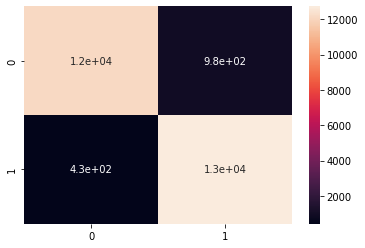

In [ ]:
sns.heatmap(confusion_matrix(y_test1,y_pred6), annot=True)

In [ ]:
fi=pd.DataFrame(rf.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)
fi

,0
used_premium_feature,0.282290
liked,0.266904
Credit1,0.050515
VerifyPhone,0.049785
Loan,0.048510
VerifyDateOfBirth,0.036690
BankVerification,0.025771
VerifyCountry,0.025353
location,0.022458
idscreen,0.015666


# svm

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv=SVC()

In [ ]:
sv.fit(X_train,y_train)

SVC()

In [ ]:
y_pred7=sv.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     10751
           1       0.80      0.71      0.75     11001

    accuracy                           0.76     21752
   macro avg       0.76      0.76      0.76     21752
weighted avg       0.76      0.76      0.76     21752



In [ ]:
print(confusion_matrix(y_test,y_pred7))

[[8754 1997]
 [3229 7772]]


In [ ]:
accuracy_score(y_test,y_pred7)

0.7597462302317028